# Logistic Regression
* Estimate the probability that instance belong to class
* If p > 50%, it's that class (+ or 1), else it's (- or 0)
* Modified Linear Regression by put result $x^T\theta$ in a logistic function.

$ \hat{p} = h_\theta(x) = \rho(x^T\theta) $

* $\hat{p}$ is the propability
* $x$ and $\theta$ is features and parameters, just like linear regression
* $\rho$ is the logictic function

## Logistic Function

$ \rho(t) = \frac{1}{1 + \text{exp(-t)}} $

* returns 1, when t > 0
* returns 0, when t < 0

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

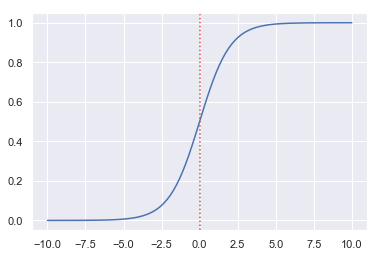

In [37]:
ts = np.linspace(-10,10,100)
ss = 1 / (1 + np.exp(-ts))
plt.plot(ts, ss)
plt.axvline(0, color="r", linestyle=':')

## Cost Function

### One instance

Cost function of a single instance of prediction as probability $\hat{p}$

$
c(\theta) = 
\begin{cases} 
      -log(\hat{p}) & \text{if } y = 1\\
      -log(1 - \hat{p}) & \text{if } y = 0
\end{cases}
$

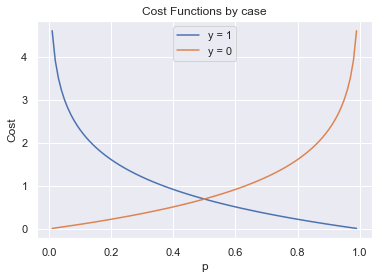

In [50]:
ts = np.linspace(0.01,0.99,100)
plt.plot(ts,-np.log(ts), label="y = 1")
plt.plot(ts,-np.log(1 - ts), label="y = 0")
plt.title("Cost Functions by case")
plt.xlabel('p')
plt.ylabel('Cost')
plt.legend()

$-log(k)$ is very large when k -> 0
* $y = 1$ case, makes cost large when $\hat{p}$ approaches 0 (wrong answer)
* $y = 0$ case, makes cost large when $\hat{p}$ approaches 1 (wrong answer)

### Cost Function of all instances
is an average of all instances costs. 
* first clause is when (y=1), second is when (y=0)
* Only one clause has value at a time, reduced to the case matching $C(\theta)$

$J(\theta) = -1/m\sum_{i=1}^{m}[y^ilog(\hat{p}^i) + (1-y^i)log(1-\hat{p}^i)]$

### Gradients

$\frac{\partial}{\partial \theta_j}\text{J}(\theta) = 1/m\sum_{i=1}^{m}(\rho(\theta^Tx^i) - y^i)x^i_j$

Very similar to the linear regression equation. 
* 1 vs 2 as constant
* apply $\rho$ function to $\theta^Tx^i$

## Try it Out

Iris dataset downloaded from sklearn and put in /datasets/iris

In [42]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df_iris = pd.read_csv("datasets/iris/iris.csv")
X_iris = df_iris[["petal width (cm)"]]
y_iris = df_iris["target"] == 'virginica'

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X_iris, y_iris)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'probability')

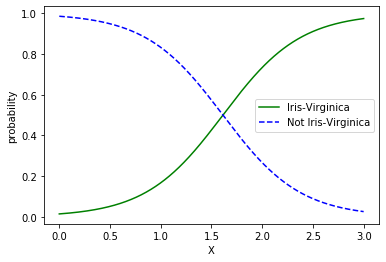

In [71]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # makes a column vector
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel("X")
plt.ylabel("probability")

In [68]:
log_reg.predict([[2.0], [1.4]]) # True @ probability > 0.5

array([ True, False])